### College List Evaluation 
#### 5/23/2019

Comparison analysis between the suggested NSC college participation list (~3500 colleges) and the existing NCES standard college list (~2500).

In [112]:
import pandas as pd
import numpy as np
from pandas import Series, DataFrame
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
from fuzzywuzzy import fuzz
import Levenshtein as lev
from fuzzywuzzy import process

In [27]:
nsc = pd.read_excel('NSC_Participation_201905.xlsx')
nsc.columns = nsc.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
nsc = nsc.drop(['participant_since', 'school_code'], axis=1)
nsc.head()

,state,school_name
0,Wyoming,Casper College
1,Wyoming,Laramie County Community College
2,Wyoming,Central Wyoming College
3,Wyoming,Northern Wyonming Community College District
4,Wyoming,Northwest College


In [29]:
nces = pd.read_excel('Std_List_Colleges.xlsx',sheet_name='A. List of College Univ (Full)')
nces.columns = std.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '') 
nces = nces.drop(['bachelors_degrees_2017'], axis=1)
nces.head()

,name
0,Abilene Christian University
1,Abraham Baldwin Agricultural College
2,Abraham Lincoln University
3,Academy College
4,Academy of Art University


In [30]:
## Number of colleges in NSC list = 3729 
nsc.count() + 1

state          3729
school_name    3729
dtype: int64

In [31]:
## Number of colleges in Std list = 2529
nces.count() + 1

name    2529
dtype: int64

In [32]:
nsc_name = nsc.school_name
nces_name = nces.name

In [33]:
overlap = Series(list(set(nsc_name) & set(nces_name)))
overlap.count() + 1
## Number of colleges overlapping in lists

1196

In [77]:
total = nsc.merge(nces,left_on='school_name',right_on='name', how="left")
total.head()
# total

,state,school_name,name
0,Wyoming,Casper College,NaN
1,Wyoming,Laramie County Community College,NaN
2,Wyoming,Central Wyoming College,NaN
3,Wyoming,Northern Wyonming Community College District,NaN
4,Wyoming,Northwest College,NaN


In [51]:
mismatch = total[total['name'].isnull()]
mismatch.head()

,state,school_name,name
0,Wyoming,Casper College,NaN
1,Wyoming,Laramie County Community College,NaN
2,Wyoming,Central Wyoming College,NaN
3,Wyoming,Northern Wyonming Community College District,NaN
4,Wyoming,Northwest College,NaN


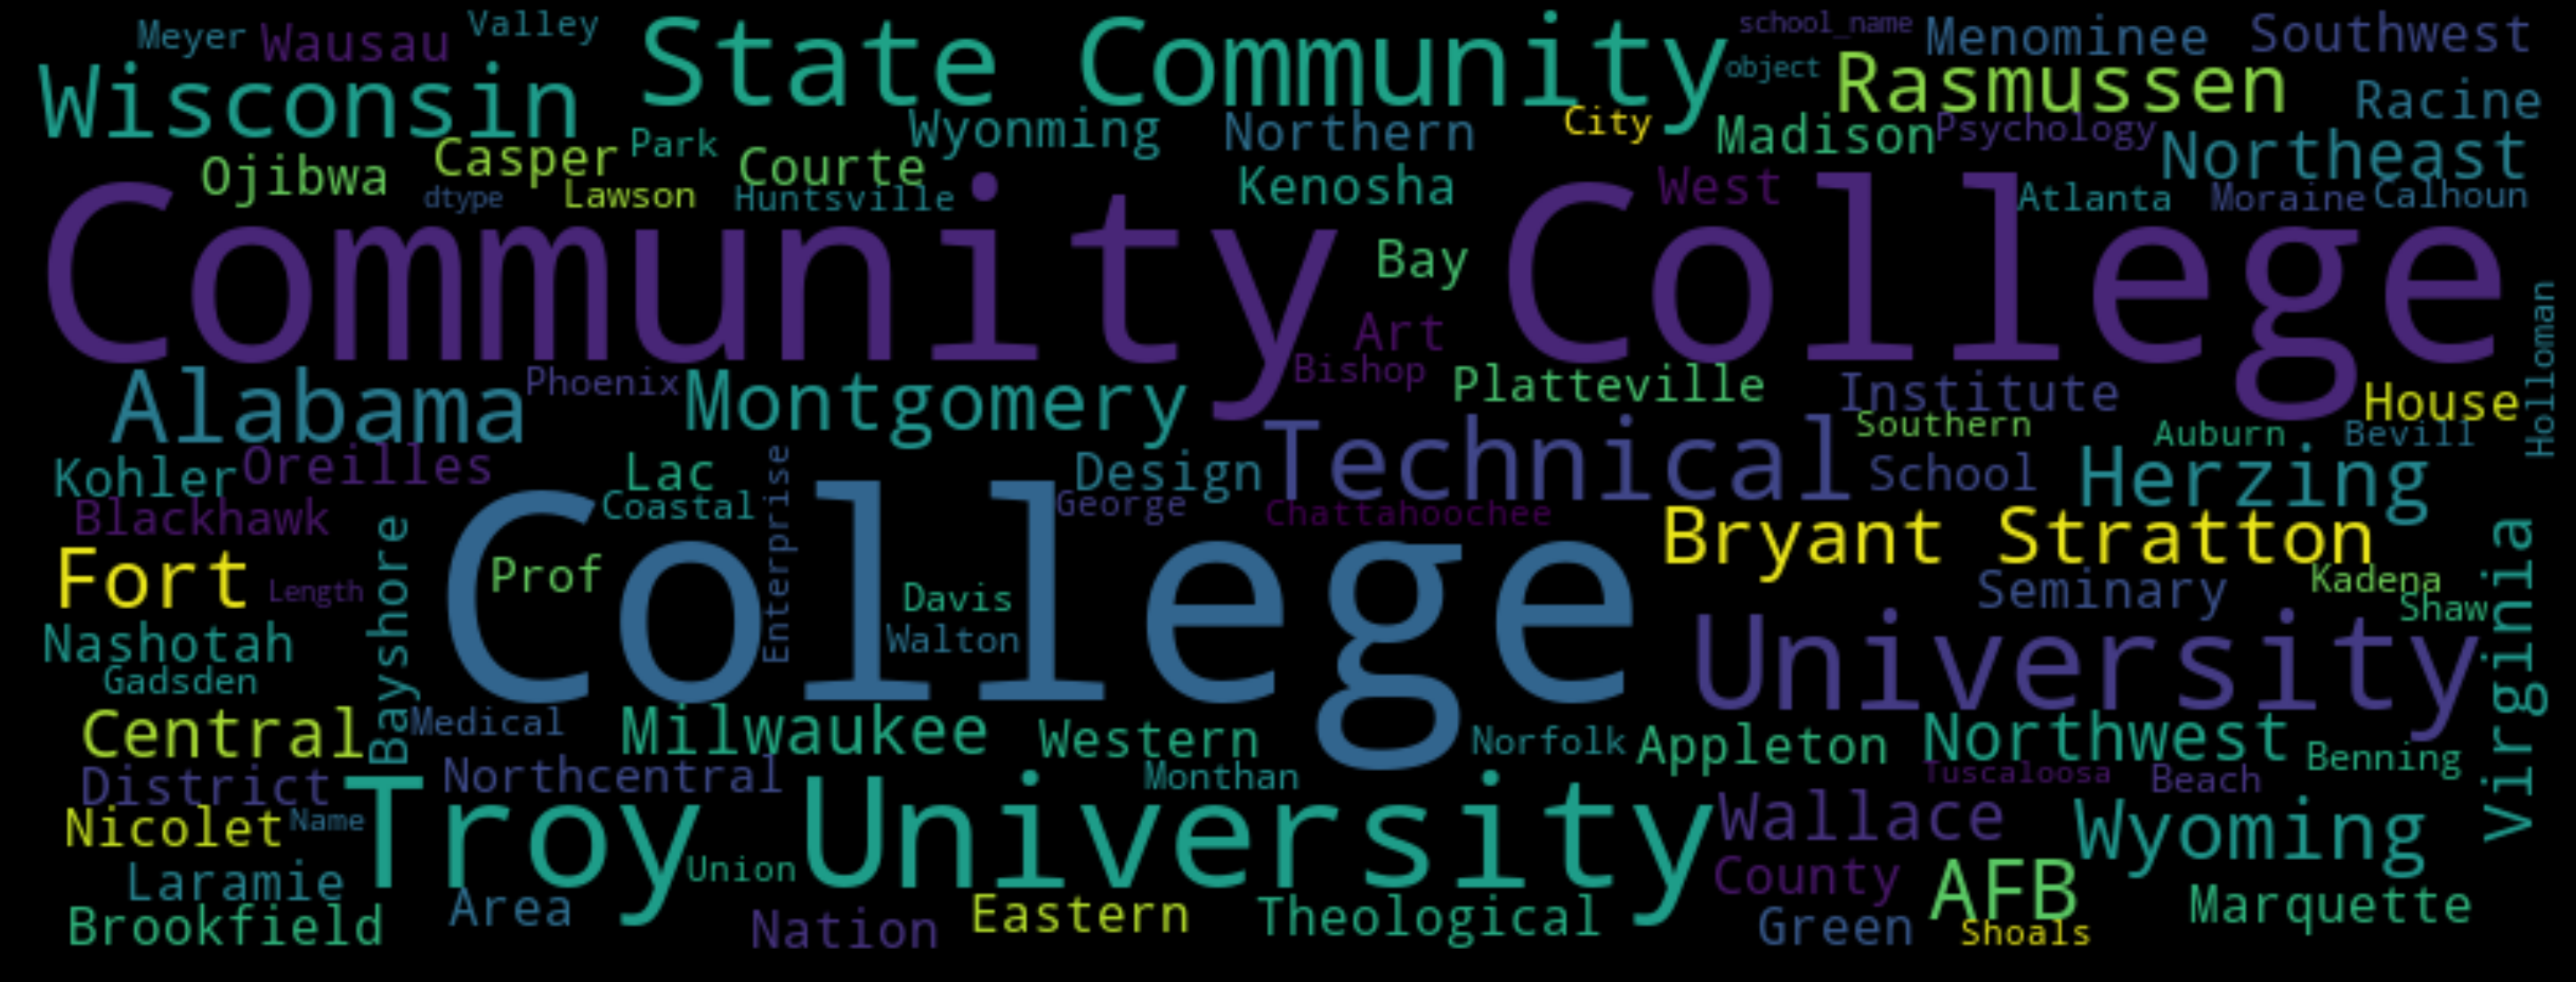

In [58]:
text = mismatch.school_name
wordcloud = WordCloud(
    width = 800,
    height = 300,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

Larger words as associated with words with higher frequency. I.e. community college is very frequent in the NSC list excluding matches from NCES.

In [75]:
str1 = "University of California, Davis"
str2 = "University of California-Davis"
distance = lev.distance(str1,str2)
distance

2

In [76]:
ratio = lev.ratio(str1,str2)
ratio

0.9508196721311475

In [81]:
nsc

,state,school_name
0,Wyoming,Casper College
1,Wyoming,Laramie County Community College
2,Wyoming,Central Wyoming College
3,Wyoming,Northern Wyonming Community College District
4,Wyoming,Northwest College
5,Wyoming,University of Wyoming
6,Wyoming,Western Wyoming Community College
7,Wyoming,Eastern Wyoming College
8,Wisconsin,Bellin College
9,Wisconsin,Bryant & Stratton College - Racine


In [111]:
# for loop using the lev ratio
# token_sort_ratio #ignores word order
l = []

for i in nces.name:
    ratio = lev.ratio(str1, i)
    l.append(ratio)
    

In [103]:
#for i in nces.name:
#    print('hi')

nces['fuzz_match'] = l

In [108]:
nces.loc[nces['fuzz_match'].idxmax()]

name          University of California-Davis
fuzz_match                           0.95082
Name: 2090, dtype: object

In [122]:
process.extractOne(str1, nces.name, score_cutoff = 60)[0]

'University of California-Davis'

Casper College
Laramie County Community College


In [ ]:
d = []
for i in nsc.school_name:
    r = process.extractOne(i, nces.name, score_cutoff=96)
    d.append(r)

In [212]:
nsc.school_name[0:20]

0                                   Casper College
1                 Laramie County Community College
2                          Central Wyoming College
3     Northern Wyonming Community College District
4                                Northwest College
5                            University of Wyoming
6                Western Wyoming Community College
7                          Eastern Wyoming College
8                                   Bellin College
9               Bryant & Stratton College - Racine
10                    Maranatha Baptist University
11                   Marquette University - Kohler
12             Nashotah House Theological Seminary
13           Milwaukee Institute of Art and Design
14                   Rasmussen College - Green Bay
15                      Rasmussen College - Wausau
16                    Rasmussen College - Appleton
17                 Herzing University - Brookfield
18                    Herzing University - Kenosha
19                    Herzing U

In [213]:
d

[None,
 None,
 None,
 None,
 None,
 ('University of Wyoming', 100, 2341),
 None,
 None,
 ('Bellin College', 100, 182),
 None,
 ('Maranatha Baptist University', 100, 1116),
 None,
 None,
 None,
 None,
 None,
 None,
 ('Herzing University-Brookfield', 97, 853),
 ('Herzing University-Kenosha', 96, 855),
 ('Herzing University-Madison', 96, 856)]